In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import seaborn as sns

In [10]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [12]:
X_development, y_development = X_train[50000:], y_train[50000:] # get 10k values for dev set 
X_train , y_train = X_train[:50000], y_train[:50000] # get 50k values for training set

i am going to use 50k vaules to train the model and 10k values to test the model on the dev set and tune it to have better results on the test set 

In [16]:
# reshape data to prepare for training 
X_train = X_train.reshape(50000,-1)
y_train = y_train.reshape(50000,-1)
X_development = X_development.reshape(10000,-1)
y_development = y_development.reshape(10000,-1)
X_test = X_test.reshape(10000,-1)
y_test = y_test.reshape(10000,-1)

In [18]:
# define function for creating RF model with a specific number of n_estimators, get the accuracy on the dev set 
def generate_RFC(x):

    # create a random forest model with x n_estimators
    forest_one = RandomForestClassifier(n_estimators=x)

    # fit the training data to the  model
    forest_one.fit(X_train,y_train.ravel())

    # get accuracy score for model on the dev set
    score = forest_one.score(X_development,y_development)

    print(f" with {x} n_estimators the model has the accuracy of : {score}")

generate_RFC(70)    

 with 70 n_estimators the model has the accuracy of : 0.9707


In [19]:
# generate models with different number of n_estimators
for i in [50,60,80,90,100]:
    generate_RFC(i)

 with 50 n_estimators the model has the accuracy of : 0.9692
 with 60 n_estimators the model has the accuracy of : 0.9708
 with 80 n_estimators the model has the accuracy of : 0.9732
 with 90 n_estimators the model has the accuracy of : 0.9698
 with 100 n_estimators the model has the accuracy of : 0.9732


by creating 5 models with different numbers of n_estimators, the model with 80 n_estimators performed the best, with accuracy of 97.32%

In [20]:
# create final model with 80 n_estimators 
final_model = RandomForestClassifier(n_estimators=80)

final_model.fit(X_train,y_train.ravel())


RandomForestClassifier(n_estimators=80)

In [21]:
# predict the values for test data 
forest_pred = final_model.predict(X_test)


<Axes: >

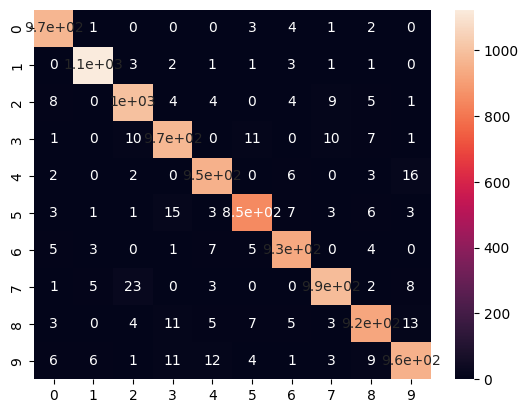

In [27]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
# confusion matrix for model 
conf_mat = confusion_matrix(y_test,forest_pred)
df = pd.DataFrame(conf_mat)

# display the confusion matrix using seaborn heatmap
sns.heatmap(df, annot=True)



In [33]:
from sklearn.metrics import accuracy_score
# accuracy of the model
print("model accuracy is: ", accuracy_score(y_test,forest_pred))

# average f1 score 
f1 = f1_score(y_test,forest_pred,average="micro")
print(f"f1 score is: {f1}")

model accuracy is:  0.966
f1 score is: 0.966


In [37]:
# which class the model struggled with the most 
f = f1_score(y_test,forest_pred, average=None)
classes = [0,1,2,3,4,5,6,7,8,9]
print(f"The most difficult class to predict: {classes[list(f).index(min(f))]}")

The most difficult class to predict: 9


In [39]:
from sklearn.metrics import classification_report

# use the classification report method to get the precision recall and f1 score per class
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

